In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC


from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
dataset = pd.read_csv('/Users/mehrac/Desktop/DSA-Python/data.csv')
df = dataset.copy()

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [4]:
df.shape

(6819, 96)

In [5]:
df.columns = [i.lower().strip().replace(' ','_') for i in df.columns]
df.columns


Index(['bankrupt?', 'roa(c)_before_interest_and_depreciation_before_interest',
       'roa(a)_before_interest_and_%_after_tax',
       'roa(b)_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre-tax_net_interest_rate',
       'after-tax_net_interest_rate',
       'non-industry_income_and_expenditure/revenue',
       'continuous_interest_rate_(after_tax)', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest-bearing_debt_interest_rate', 'tax_rate_(a)',
       'net_value_per_share_(b)', 'net_value_per_share_(a)',
       'net_value_per_share_(c)', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share_(yuan_¥)',
       'operating_profit_per_share_(yuan_¥)',
       'per_share_net_profit_before_tax_(yuan_¥)',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after-tax

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()


0

In [9]:
df['bankrupt?'].value_counts()


bankrupt?
0    6599
1     220
Name: count, dtype: int64

<Axes: xlabel='bankrupt?', ylabel='count'>

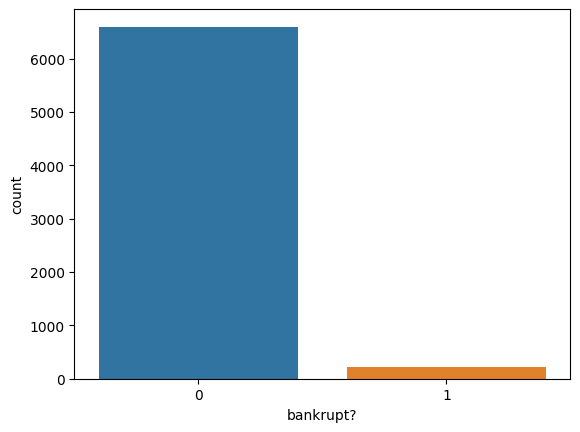

In [10]:
sns.countplot(x=df['bankrupt?'])


In [12]:
df['liability-assets_flag'].value_counts()


liability-assets_flag
0    6811
1       8
Name: count, dtype: int64

In [14]:
df['net_income_flag'].value_counts()


net_income_flag
1    6819
Name: count, dtype: int64

In [16]:
df.isnull().sum().sum()

0

In [18]:
df.drop('net_income_flag', axis=1, inplace=True)

KeyError: "['net_income_flag'] not found in axis"

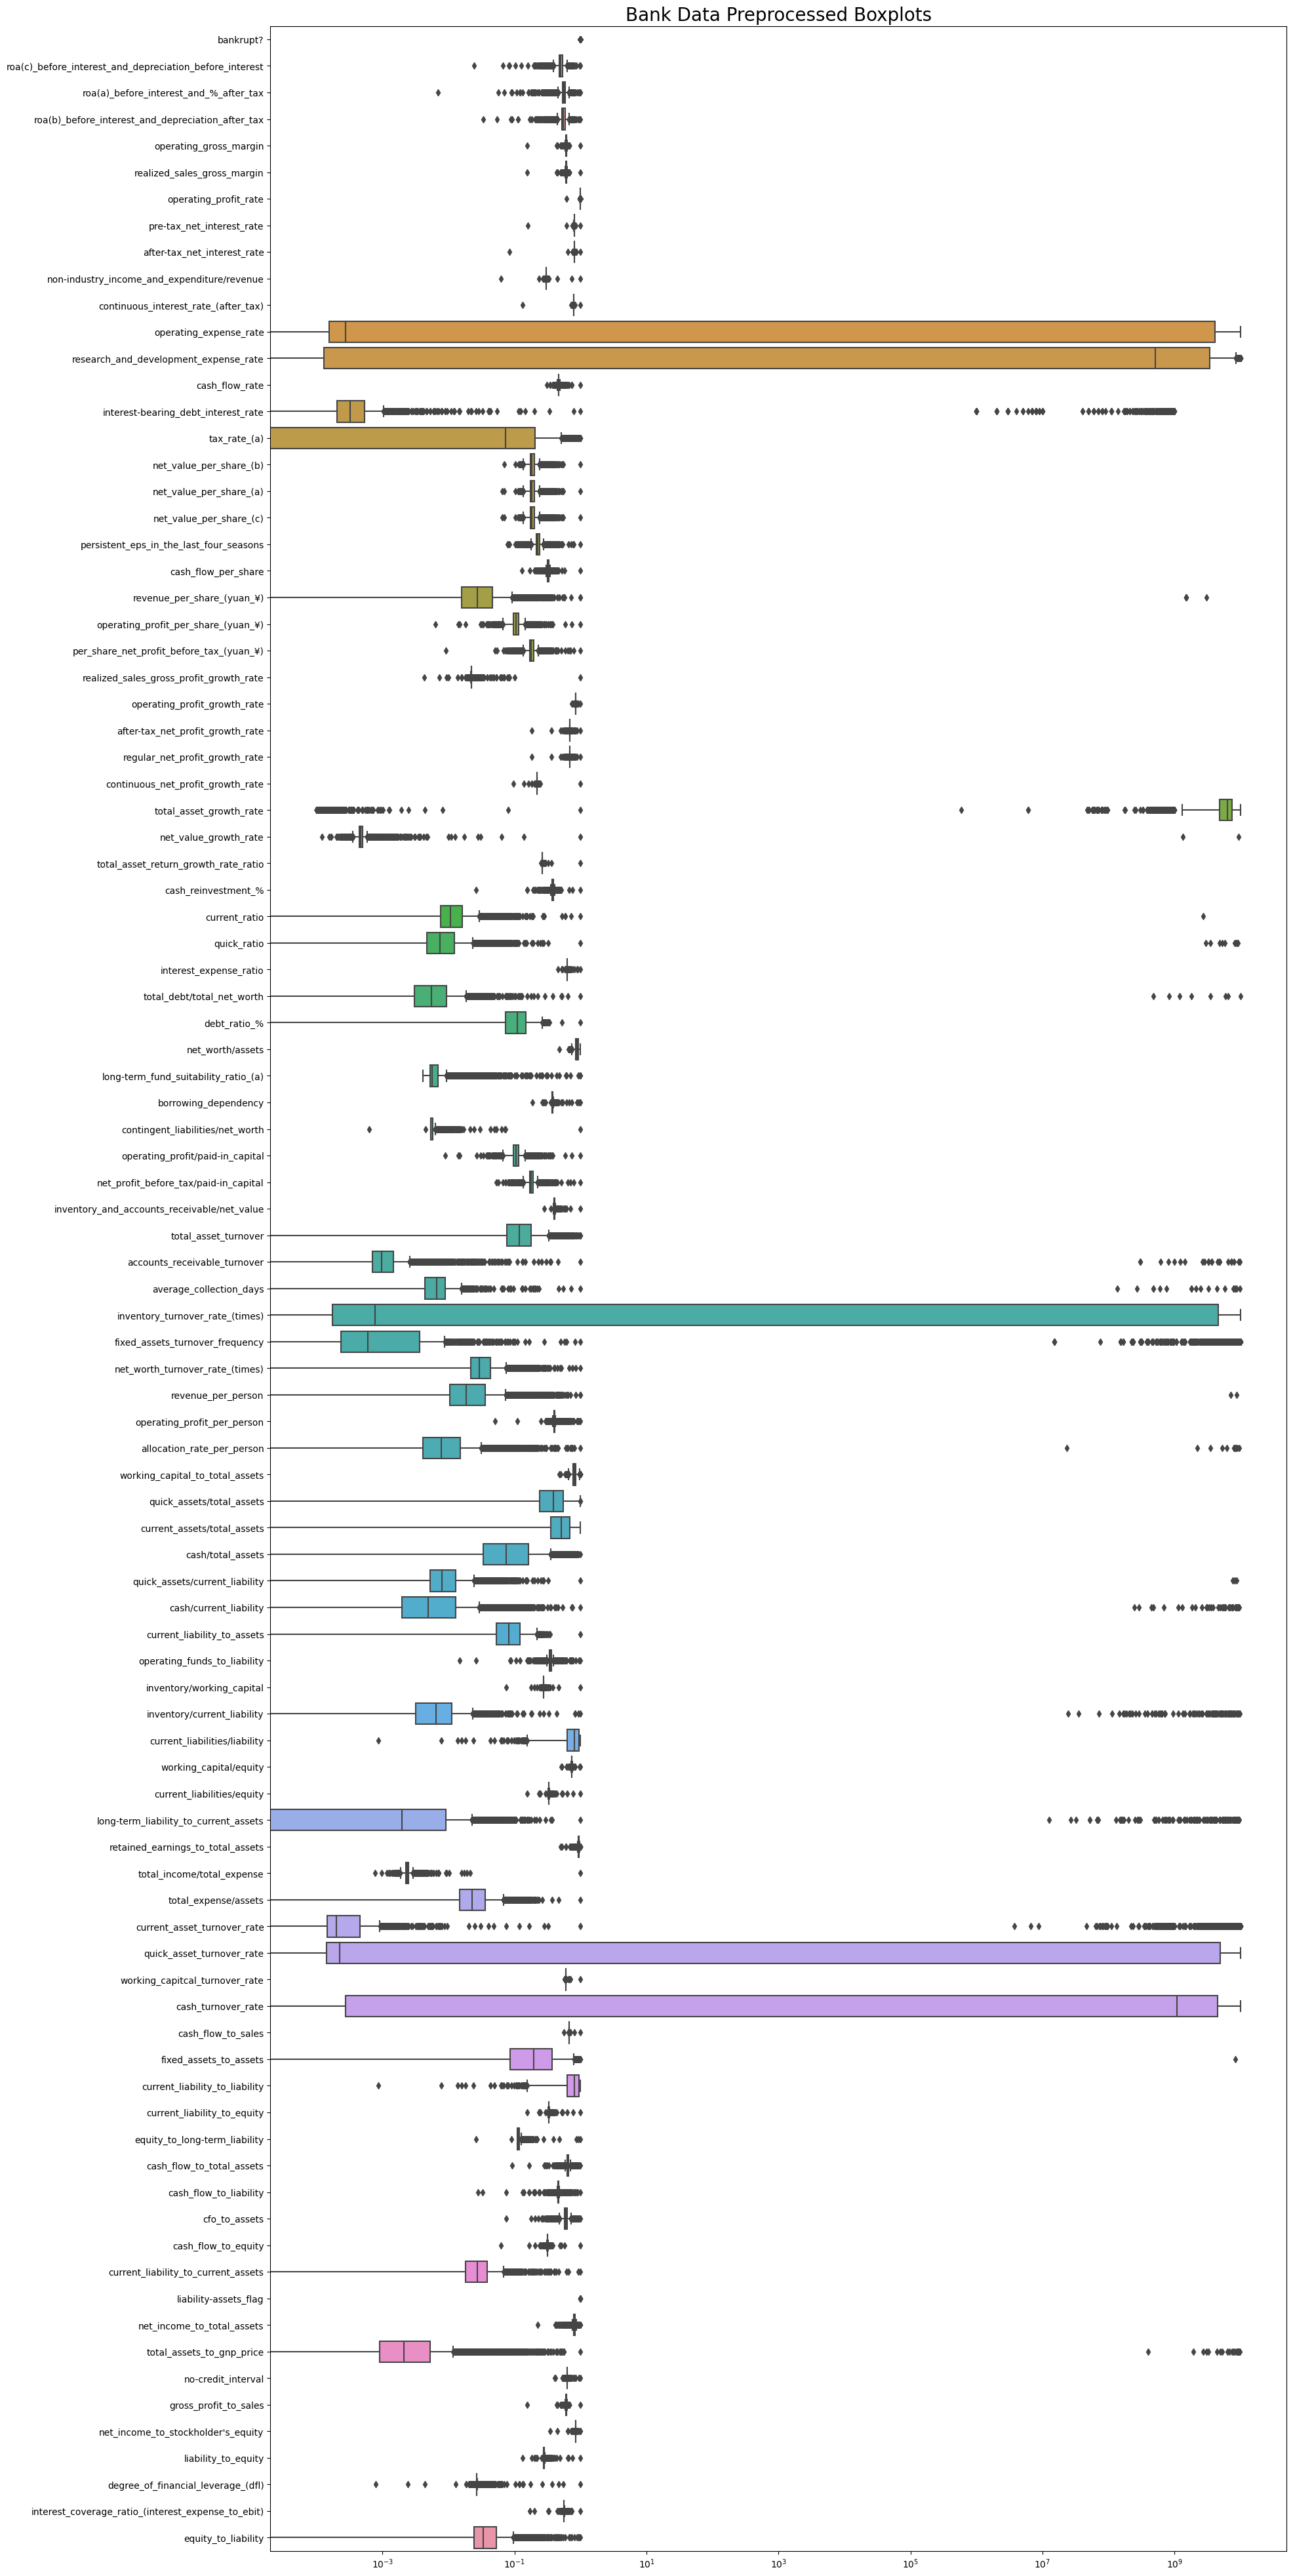

In [20]:
plt.figure(figsize = (20,50))
ax = sns.boxplot(data=df, orient="h")
ax.set_title('Bank Data Preprocessed Boxplots', fontsize=20)
ax.set(xscale='log')
plt.show()

In [22]:
X=df.iloc[:,1:]
y =df.iloc[:,[0]]
scaler= RobustScaler()
X.iloc[:,:] = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=123, stratify=y)


Bagging Classifier

In [24]:
svm = SVC(probability=True)

bag= BaggingClassifier(base_estimator = svm, n_estimators = 10, max_samples = 0.4, max_features = 35, bootstrap=True, bootstrap_features = True, n_jobs = -1, random_state=123)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046



In [25]:
classifier = RandomForestClassifier()
bag= BaggingClassifier(base_estimator = classifier, n_estimators = 10, max_samples = 0.4, max_features = 35, bootstrap=True, bootstrap_features = True, n_jobs = -1, random_state=123)

In [27]:
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)

In [28]:
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.67      0.12      0.21        66

    accuracy                           0.97      2046
   macro avg       0.82      0.56      0.59      2046
weighted avg       0.96      0.97      0.96      2046



Undersampling

In [29]:
undersample = NearMiss(version=1, n_neighbors = 3)
X_train_us, y_train_us = undersample.fit_resample(X_train, y_train)

In [30]:
y_train_us.value_counts()

bankrupt?
0            154
1            154
Name: count, dtype: int64

Bagging Classifier

In [31]:
classifier = RandomForestClassifier()

bag= BaggingClassifier(base_estimator = classifier, n_estimators = 10, max_samples = 0.4, max_features = 35, bootstrap=True, bootstrap_features = True, n_jobs = -1, random_state=123)
bag.fit(X_train_us, y_train_us)
bag_pred = bag.predict(X_test)
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80      1980
           1       0.09      0.94      0.16        66

    accuracy                           0.68      2046
   macro avg       0.54      0.81      0.48      2046
weighted avg       0.97      0.68      0.78      2046



Boosting Models


In [32]:
gbc = GradientBoostingClassifier(random_state = 123)
gbc.fit(X_train_us, y_train_us)
gbc_pred = gbc.predict(X_test)
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      1980
           1       0.08      0.97      0.15        66

    accuracy                           0.64      2046
   macro avg       0.54      0.80      0.46      2046
weighted avg       0.97      0.64      0.75      2046



In [33]:
xgbt = XGBClassifier()
xgbt.fit(X_train_us, y_train_us)
xgbt_pred = xgbt.predict(X_test)
print(classification_report(y_test, xgbt_pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      1980
           1       0.08      0.97      0.15        66

    accuracy                           0.64      2046
   macro avg       0.54      0.80      0.46      2046
weighted avg       0.97      0.64      0.75      2046



In [34]:
cb = CatBoostClassifier(verbose=0)
cb.fit(X_train_us, y_train_us)
cb_pred = cb.predict(X_test)
print(classification_report(y_test, cb_pred))

              precision    recall  f1-score   support

           0       1.00      0.69      0.81      1980
           1       0.09      0.92      0.16        66

    accuracy                           0.69      2046
   macro avg       0.54      0.81      0.49      2046
weighted avg       0.97      0.69      0.79      2046



Oversampling

In [35]:
ros = RandomOverSampler(random_state=123)

In [36]:
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

In [37]:
y_train_os.value_counts()

bankrupt?
0            4619
1            4619
Name: count, dtype: int64

In [38]:
svm = SVC(probability=True)

bag= BaggingClassifier(base_estimator = svm, n_estimators = 10, max_samples = 0.4, max_features = 35, bootstrap=True, bootstrap_features = True, n_jobs = -1, random_state=123)
bag.fit(X_train_os, y_train_os)
bag_pred = bag.predict(X_test)
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      1980
           1       0.05      0.42      0.09        66

    accuracy                           0.74      2046
   macro avg       0.51      0.59      0.47      2046
weighted avg       0.95      0.74      0.82      2046



In [39]:
gbc = GradientBoostingClassifier(random_state = 123)
gbc.fit(X_train_os, y_train_os)
gbc_pred = gbc.predict(X_test)
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1980
           1       0.28      0.68      0.39        66

    accuracy                           0.93      2046
   macro avg       0.63      0.81      0.68      2046
weighted avg       0.97      0.93      0.95      2046



In [40]:
xgbt = XGBClassifier()
xgbt.fit(X_train_os, y_train_os)
xgbt_pred = xgbt.predict(X_test)
print(classification_report(y_test, xgbt_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1980
           1       0.51      0.36      0.42        66

    accuracy                           0.97      2046
   macro avg       0.74      0.68      0.70      2046
weighted avg       0.96      0.97      0.97      2046

